In [1]:
import matplotlib.pyplot as plt
from train import generator
import numpy as np

2023-07-14 20:05:55.943686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 20:05:56.293673: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
%matplotlib widget 
average_data = np.zeros((8,8,8))
count = 0

pur_data = np.zeros((8,8,8))
pyr_data = np.zeros((8,8,8))

pur_count = 0 
pyr_count = 0

for x in generator():
    data, classification = x
    # print(data.shape)
    data = data.reshape(data.shape[:-1])
    
    if classification == [0,1]:
        pur_data += data
        pur_count += 1
    elif classification == [1,0]:
        pyr_data += data
        pyr_count += 1
    
    if pur_count >= 10 and pyr_count >= 10: 
        break

pur_data /= pur_count
pyr_data /= pyr_count

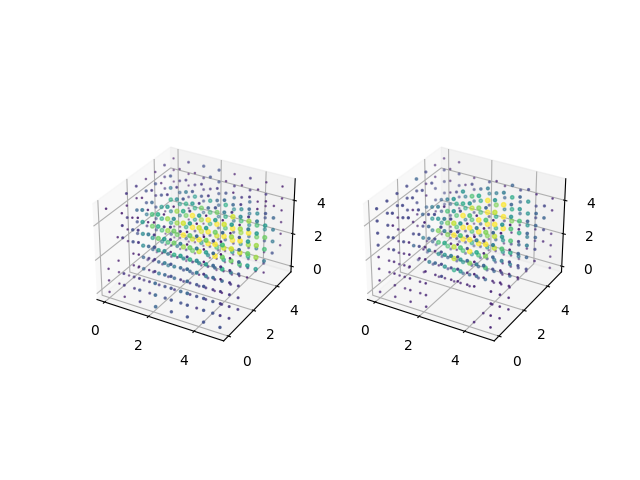

In [4]:
%matplotlib widget 

data = average_data
fig = plt.figure()
ax = fig.add_subplot(1,2,1,projection='3d')
ax2 = fig.add_subplot(1,2,2,projection='3d')

X,Y,Z = np.meshgrid(np.arange(0,8)*0.7,
                    np.arange(0,8)*0.7,
                    np.arange(0,8)*0.7)

ax.scatter(X,Y,Z, s=10*pur_data, c=pur_data)
ax2.scatter(X,Y,Z, s=10*pyr_data, c=pyr_data)
plt.show()